<h1>
<center> Unit 2 - Problem Set 2
</center>
</h1>

---

iRobot is a company (started by MIT alumni and faculty) that sells the Roomba vacuuming robot (watch one of the product videos to see these robots in action). Roomba robots move around the floor, cleaning the area they pass over.

In this problem set, you will code a simulation to compare how much time a group of Roomba-like robots will take to clean the floor of a room using two different strategies.

The following simplified model of a single robot moving in a square 5x5 room should give you some intuition about the system we are simulating.

The robot starts out at some random position in the room, and with a random direction of motion. The illustrations below show the robot's position (indicated by a black dot) as well as its direction (indicated by the direction of the red arrowhead).

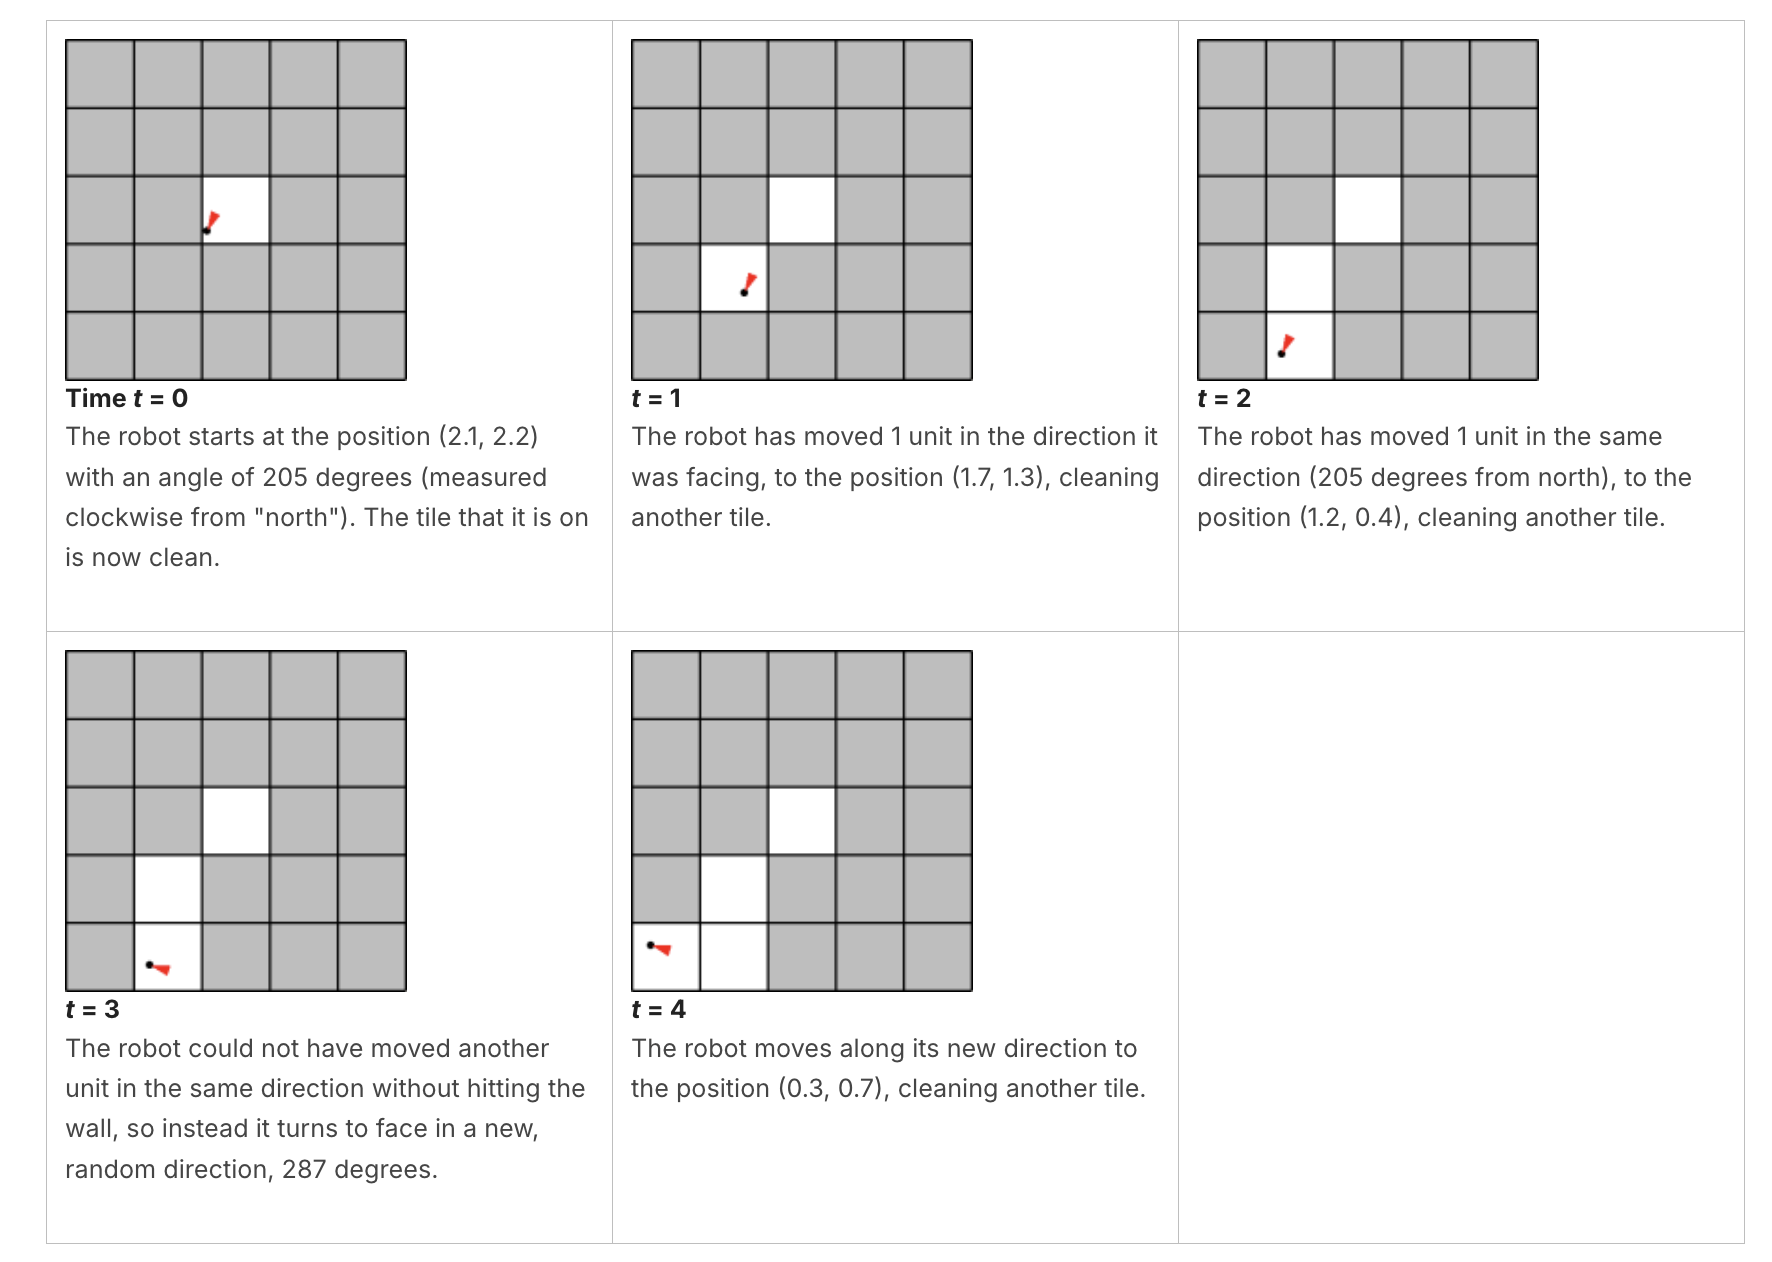

<h2>
<center> Simulation Details </center>
</h2>

Here are additional details about the simulation model. Read these carefully.

**Multiple robots**

In general, there are N > 0 robots in the room, where N is given. For simplicity, assume that robots are points and can pass through each other or occupy the same point without interfering.

**The room**

The room is rectangular with some integer width w and height h, which are given. Initially the entire floor is dirty. A robot cannot pass through the walls of the room. A robot may not move to a point outside the room.

**Tiles**

You will need to keep track of which parts of the floor have been cleaned by the robot(s). We will divide the area of the room into 1x1 tiles (there will be w * h such tiles). When a robot's location is anywhere in a tile, we will consider the entire tile to be cleaned (as in the pictures above). By convention, we will refer to the tiles using ordered pairs of integers: (0, 0), (0, 1), ..., (0, h-1), (1, 0), (1, 1), ..., (w-1, h-1).

**Robot motion rules**

Each robot has a position inside the room. We'll represent the position using coordinates (x, y) which are floats satisfying 0 ≤ x < w and 0 ≤ y < h. In our program we'll use instances of the Position class to store these coordinates.

A robot has a direction of motion. We'll represent the direction using an integer d satisfying 0 ≤ d < 360, which gives an angle in degrees.

All robots move at the same speed s, a float, which is given and is constant throughout the simulation. Every time-step, a robot moves in its direction of motion by s units.

If a robot detects that it will hit the wall within the time-step, that time step is instead spent picking a new direction at random. The robot will attempt to move in that direction on the next time step, until it reaches another wall.

**Termination**

The simulation ends when a specified fraction of the tiles in the room have been cleaned.

<h2>
<center> Probelm 1: Rectangular Room Class </center>
</h2>

---

In this problem you will implement the RectangularRoom class. For this class, decide what fields you will use and decide how the following operations are to be performed:

- Initializing the object
- Marking an appropriate tile as cleaned when a robot moves to a given position (casting floats to ints - and/or the function math.floor - may be useful to you here)
- Determining if a given tile has been cleaned
- Determining how many tiles there are in the room
- Determining how many cleaned tiles there are in the room
- Getting a random position in the room
- Determining if a given position is in the room
- Complete the RectangularRoom class by implementing its methods in ps2.py.

Although this problem has many parts, it should not take long once you have chosen how you wish to represent your data. For reasonable representations, a majority of the methods will require only a couple of lines of code.

In [12]:
import math
import random

class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. At any
    particular time, each of these tiles is either clean or dirty.
    """
    def __init__(self, width, height):
        """
        Initializes a rectangular room with the specified width and height.

        Initially, no tiles in the room have been cleaned.

        width: an integer > 0
        height: an integer > 0
        """

        self.w = width
        self.h = height 
        self.cleanTile = {}

    def cleanTileAtPosition(self, pos):
        """
        Mark the tile under the position POS as cleaned.

        Assumes that POS represents a valid position inside this room.

        pos: a Position
        """
        pos_width = float(math.floor(pos.getX()))
        pos_height = float(math.floor(pos.getY()))
        self.cleanTile[(pos_width,pos_height)] = 'cleaned'

    def isTileCleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer
        returns: True if (m, n) is cleaned, False otherwise
        """

        if (m,n) in self.cleanTile:
            return True
        else:
            return False

    def getNumTiles(self):
        """
        Return the total number of tiles in the room.

        returns: an integer
        """
        return self.w * self.h

    def getNumCleanedTiles(self):
        """
        Return the total number of clean tiles in the room.

        returns: an integer
        """
        return len(self.cleanTile)
    def getRandomPosition(self):
        """
        Return a random position inside the room.

        returns: a Position object.
        """
        import random 
        rand_w = random.randint(0,self.w-1)
        rand_h = random.randint(0,self.h-1)
        return Position(rand_w,rand_h)

    def isPositionInRoom(self, pos):
        """
        Return True if pos is inside the room.

        pos: a Position object.
        returns: True if pos is in the room, False otherwise.
        """
        check_w = pos.getX()
        check_h = pos.getY()
        if math.floor(check_w) in range(0,self.w) and math.floor(check_h) in range(0,self.h):
            return True
        else:
            return False

In [13]:
# Test 1 : class creation
room = RectangularRoom(5, 5)
print(room.getNumTiles())

# Test 2 : test getNumTiles
room = RectangularRoom(3, 6)
room = RectangularRoom(4, 5)
room = RectangularRoom(15, 7)
room = RectangularRoom(9, 10)
room = RectangularRoom(11, 9)
print(room.getNumTiles())

# Test 3 : unclean tiles
room = RectangularRoom(4, 6)
print(room.getNumTiles())

25
99
24


<h2>
<center> Problem 2: Robot Class </center>
</h2>

---

For this class, decide what fields you will use and decide how the following operations are to be performed:

- Initializing the object
- Accessing the robot's position
- Accessing the robot's direction
- Setting the robot's position
- Setting the robot's direction

**Note**: When a Robot is initialized, it should clean the first tile it is initialized on. Generally the model these Robots will follow is that after a robot lands on a given tile, we will mark the entire tile as clean. This might not make sense if you're thinking about really large tiles, but as we make the size of the tiles smaller and smaller, this does actually become a pretty good approximation.

Although this problem has many parts, it should not take long once you have chosen how you wish to represent your data. For reasonable representations, a majority of the methods will require only a couple of lines of code.

**Note**: The Robot class is an abstract class, which means that we will never make an instance of it. Read up on the Python docs on abstract classes at this link and if you want more examples on abstract classes, follow this link.

In the final implementation of Robot, not all methods will be implemented. Not to worry -- its subclass(es) will implement the method `updatePositionAndClean()`

In [16]:
import math
import random

class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. At any
    particular time, each of these tiles is either clean or dirty.
    """
    def __init__(self, width, height):
        """
        Initializes a rectangular room with the specified width and height.

        Initially, no tiles in the room have been cleaned.

        width: an integer > 0
        height: an integer > 0
        """

        self.w = width
        self.h = height 
        self.cleanTile = {}

    def cleanTileAtPosition(self, pos):
        """
        Mark the tile under the position POS as cleaned.

        Assumes that POS represents a valid position inside this room.

        pos: a Position
        """
        pos_width = float(math.floor(pos.getX()))
        pos_height = float(math.floor(pos.getY()))
        self.cleanTile[(pos_width,pos_height)] = 'cleaned'

    def isTileCleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer
        returns: True if (m, n) is cleaned, False otherwise
        """

        if (m,n) in self.cleanTile:
            return True
        else:
            return False

    def getNumTiles(self):
        """
        Return the total number of tiles in the room.

        returns: an integer
        """
        return self.w * self.h 

    def getNumCleanedTiles(self):
        """
        Return the total number of clean tiles in the room.

        returns: an integer
        """
        return len(self.cleanTile)
    def getRandomPosition(self):
        """
        Return a random position inside the room.

        returns: a Position object.
        """
        import random 
        rand_w = random.randint(0,self.w-1)
        rand_h = random.randint(0,self.h-1)
        return Position(rand_w,rand_h)

    def isPositionInRoom(self, pos):
        """
        Return True if pos is inside the room.

        pos: a Position object.
        returns: True if pos is in the room, False otherwise.
        """
        check_w = pos.getX()
        check_h = pos.getY()
        if math.floor(check_w) in range(0,self.w) and math.floor(check_h) in range(0,self.h):
            return True
        else:
            return False


class Robot(object):
    """
    Represents a robot cleaning a particular room.
    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.
    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
        """
        Initializes a Robot with the given speed in the specified room. The
        robot initially has a random direction and a random position in the
        room. The robot cleans the tile it is on.
        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        """
        #raise NotImplementedError
        self.room = room
        self.speed = speed
        self.position = room.getRandomPosition()
        self.direction = random.randint(0, 359)

    def getRobotPosition(self):
        """
        Return the position of the robot.
        returns: a Position object giving the robot's position.
        """
        #raise NotImplementedError
        return self.position
    
    def getRobotDirection(self):
        """
        Return the direction of the robot.
        returns: an integer d giving the direction of the robot as an angle in
        degrees, 0 <= d < 360.
        """
        #raise NotImplementedError
        return self.direction

    def setRobotPosition(self, position):
        """
        Set the position of the robot to POSITION.
        position: a Position object.
        """
        #raise NotImplementedError
        self.position = position

    def setRobotDirection(self, direction):
        """
        Set the direction of the robot to DIRECTION.
        direction: integer representing an angle in degrees
        """
        #raise NotImplementedError
        self.direction = direction

    def updatePositionAndClean(self):
        """
        Simulate the raise passage of a single time-step.
        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        raise NotImplementedError # don't change this!

In [18]:
class Position(object):
    """
    A Position represents a location in a two-dimensional room.
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
        
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: number representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.getX(), self.getY()
        angle = float(angle)
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        return Position(new_x, new_y)

    def __str__(self):  
        return "(%0.2f, %0.2f)" % (self.x, self.y)


In [21]:
# Test 1 : test setRobotPosition
robot = Robot(RectangularRoom(5,8), 1.0)
print(robot.getRobotPosition())

# Test 2 : test setRobotDirection
robot = Robot(RectangularRoom(5,8), 1.0)
print(robot.getRobotDirection())

(3.00, 0.00)
277


<h2>
<center> Problem 3: StandardRobot Class </center>
</h2>

---

Each robot must also have some code that tells it how to move about a room, which will go in a method called `updatePositionAndClean`.

Ordinarily we would consider putting all the robot's methods in a single class. However, later in this problem set we'll consider robots with alternate movement strategies, to be implemented as different classes with the same interface. These classes will have a different implementation of `updatePositionAndClean` but are for the most part the same as the original robots. Therefore, we'd like to use inheritance to reduce the amount of duplicated code.


In [22]:
class Robot(object):
    """
    Represents a robot cleaning a particular room.
    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.
    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
        """
        Initializes a Robot with the given speed in the specified room. The
        robot initially has a random direction and a random position in the
        room. The robot cleans the tile it is on.
        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        """
        #raise NotImplementedError
        self.room = room
        self.speed = speed
        self.position = room.getRandomPosition()
        self.direction = random.randint(0, 359)
        self.room.cleanTileAtPosition(self.position)

    def getRobotPosition(self):
        """
        Return the position of the robot.
        returns: a Position object giving the robot's position.
        """
        #raise NotImplementedError
        return self.position
    
    def getRobotDirection(self):
        """
        Return the direction of the robot.
        returns: an integer d giving the direction of the robot as an angle in
        degrees, 0 <= d < 360.
        """
        #raise NotImplementedError
        return self.direction

    def setRobotPosition(self, position):
        """
        Set the position of the robot to POSITION.
        position: a Position object.
        """
        #raise NotImplementedError
        self.position = position

    def setRobotDirection(self, direction):
        """
        Set the direction of the robot to DIRECTION.
        direction: integer representing an angle in degrees
        """
        #raise NotImplementedError
        self.direction = direction

    def updatePositionAndClean(self):
        """
        Simulate the raise passage of a single time-step.
        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        raise NotImplementedError # don't change this!


# === Problem 3
class StandardRobot(Robot):
    """
    A StandardRobot is a Robot with the standard movement strategy.
    At each time-step, a StandardRobot attempts to move in its current
    direction; when it would hit a wall, it *instead* chooses a new direction
    randomly.
    """
    def updatePositionAndClean(self):
        """
        Simulate the raise passage of a single time-step.
        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        #raise NotImplementedError
        next_position = self.getRobotPosition().getNewPosition(self.getRobotDirection(), self.speed)
        if self.room.isPositionInRoom(next_position) == False:
            self.setRobotDirection(random.randint(0, 359))
        else:
            self.setRobotPosition(next_position)            
            self.room.cleanTileAtPosition(next_position)

In [24]:
# Test 1 : test setRobotPosition
robot = StandardRobot(RectangularRoom(5,8), 1.0)
print(robot.getRobotPosition())

# Test 2 : test setRobotDirection
robot = StandardRobot(RectangularRoom(5,8), 1.0)
print(robot.getRobotDirection())

(1.00, 7.00)
101


<h2>
<center> Problem 4 : Running the Simulation </center>
</h2>

---

In this problem you will write code that runs a complete robot simulation.

Recall that in each trial, the objective is to determine how many time-steps are on average needed before a specified fraction of the room has been cleaned. Implement the following function:


In [25]:
def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.

    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.
    """

The first six parameters should be self-explanatory. For the time being, you should pass in StandardRobot for the robot_type parameter, like so:

avg = runSimulation(10, 1.0, 15, 20, 0.8, 30, StandardRobot)

Then, in runSimulation you should use robot_type(...) instead of StandardRobot(...) whenever you wish to instantiate a robot. (This will allow us to easily adapt the simulation to run with different robot implementations, which you'll encounter in Problem 6.)

**Graded [10.0/10.0]**

In [26]:
def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.
    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.
    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    width: an int (width > 0)
    height: an int (height > 0)
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                RandomWalkRobot)
    """
    #raise NotImplementedError
    # do this in a while loop, but has to be in for loop of num_trials:
    # and instantiate a container to store the results
    results = []
    for i in range(num_trials):
        #anim = ps2_visualize.RobotVisualization(num_robots, width, height)
        num_steps = 0
        # Instantiate a new room
        room = RectangularRoom(width, height)
        # Instantiate the robots
        robots = [robot_type(room, speed) for j in range(num_robots)]
        while (room.getNumCleanedTiles()/room.getNumTiles()) < min_coverage:
            num_steps += 1
            #anim.update(room, robots)
            for k in robots:
                k.updatePositionAndClean()
            if (room.getNumCleanedTiles()/room.getNumTiles()) >= min_coverage:
                results.append(num_steps)
                #anim.done()
            else:
                continue
    # return mean
    return sum(results)/len(results)

<h2>
<center> Problem 5 - RandomWalkRobot Class </center>
</h2>

---

iRobot is testing out a new robot design. The proposed new robots differ in that they change direction randomly after every time step, rather than just when they run into walls. You have been asked to design a simulation to determine what effect, if any, this change has on room cleaning times.

Write a new class `RandomWalkRobot` that inherits from Robot (like StandardRobot) but implements the new movement strategy. `RandomWalkRobot` should have the same interface as StandardRobot.

Test out your new class. Perform a single trial with the StandardRobot implementation and watch the visualization to make sure it is doing the right thing. Once you are satisfied, you can call runSimulation again, passing `RandomWalkRobot` instead of `StandardRobot`.

In [30]:
class Robot(object):
    """
    Represents a robot cleaning a particular room.
    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.
    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
        """
        Initializes a Robot with the given speed in the specified room. The
        robot initially has a random direction and a random position in the
        room. The robot cleans the tile it is on.
        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        """
        #raise NotImplementedError
        self.room = room
        self.speed = speed
        self.position = room.getRandomPosition()
        self.direction = random.randint(0, 359)
        self.room.cleanTileAtPosition(self.position)

    def getRobotPosition(self):
        """
        Return the position of the robot.
        returns: a Position object giving the robot's position.
        """
        #raise NotImplementedError
        return self.position
    
    def getRobotDirection(self):
        """
        Return the direction of the robot.
        returns: an integer d giving the direction of the robot as an angle in
        degrees, 0 <= d < 360.
        """
        #raise NotImplementedError
        return self.direction

    def setRobotPosition(self, position):
        """
        Set the position of the robot to POSITION.
        position: a Position object.
        """
        #raise NotImplementedError
        self.position = position

    def setRobotDirection(self, direction):
        """
        Set the direction of the robot to DIRECTION.
        direction: integer representing an angle in degrees
        """
        #raise NotImplementedError
        self.direction = direction

    def updatePositionAndClean(self):
        """
        Simulate the raise passage of a single time-step.
        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        raise NotImplementedError # don't change this!

class RandomWalkRobot(Robot):
    """
    A RandomWalkRobot is a robot with the "random walk" movement strategy: it
    chooses a new direction at random at the end of each time-step.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.
        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        #raise NotImplementedError
        next_position = self.getRobotPosition().getNewPosition(random.randint(0, 359), self.speed)
        if self.room.isPositionInRoom(next_position) == False:
            self.setRobotDirection(random.randint(0, 359))
        else:
            self.setRobotPosition(next_position)
            self.setRobotDirection(random.randint(0, 359))
            self.room.cleanTileAtPosition(next_position)

In [32]:
# Test 1 : test setRobotPosition
robot = RandomWalkRobot(RectangularRoom(4, 9), 1.0)
print(robot.getRobotPosition())

# Test 2 : test setRobotDirection
robot = RandomWalkRobot(RectangularRoom(5,8), 1.0)
print(robot.getRobotDirection())

(1.00, 7.00)
257
